In [3]:
import sys
import math

import torch
import numpy as np
import matplotlib.pyplot as plt
import dsdl
import gpytorch
import tqdm

from torcheval.metrics import BinaryAUROC

sys.path.append("..")

from src._97_gpytorch import LogisticGPVI, GPModel, LogitLikelihood, PGLikelihood

%load_ext autoreload
%autoreload 2

In [2]:
data = dsdl.load("breast-cancer")

In [3]:
X, y = data.get_train()
X = X.todense()

X = torch.tensor(X, dtype=torch.float)
Xstd = X.std(dim=0)
Xmean = X.mean(dim=0)
X = (X - Xmean) / Xstd
y = torch.tensor(y, dtype=torch.float)
y[y == 2] = 0
y[y == 4] = 1

In [4]:
f0 = LogisticGPVI(y, X, n_inducing=50, n_iter=200, verbose=False)
f0.fit()
f0.runtime

8.505290985107422

In [68]:
f1 = LogisticGPVI(y, X, likelihood=PGLikelihood(), n_inducing=50, n_iter=200, thresh=1e-6, verbose=False)
f1.fit()
f1.runtime

5.1853251457214355

In [69]:
y_pred = f0.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.9544, dtype=torch.float64)


In [70]:
y_pred = f1.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.9554, dtype=torch.float64)


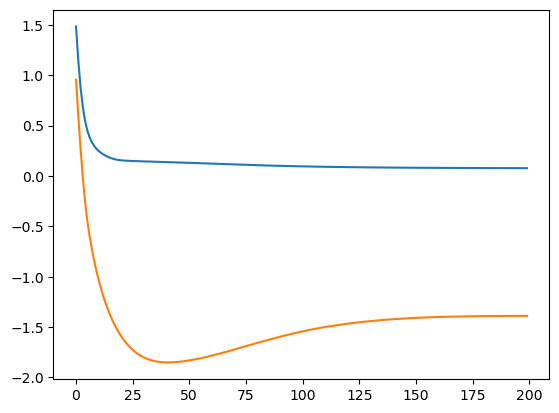

In [71]:
plt.plot(f0.loss)
plt.plot(f1.loss)

In [72]:
lower, upper = f0.credible_intervals(X)
print( (upper - lower).mean() )

lower, upper = f1.credible_intervals(X)
print( (upper - lower).mean() )

tensor(0.7430)
tensor(0.5389)


# Diabetes dataset

In [85]:
data = dsdl.load("diabetes_scale")

In [87]:
X, y = data.get_train()
X = X.todense()

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
y[y == -1] = 0

In [99]:
f0 = LogisticGPVI(y, X, n_inducing=50, n_iter=200, thresh=1e-6, verbose=False)
f0.fit()
f0.runtime

7.856612682342529

In [100]:
f1 = LogisticGPVI(y, X, likelihood=PGLikelihood(), n_inducing=50, n_iter=200, thresh=1e-6, verbose=False)
f1.fit()
f1.runtime

6.624014854431152

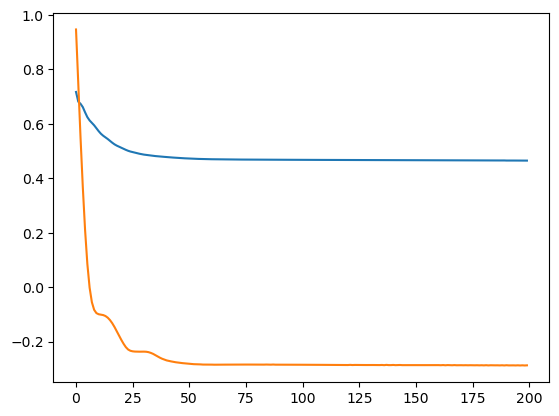

In [101]:
plt.plot(f0.loss)
plt.plot(f1.loss)

In [102]:
y_pred = f0.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.6728, dtype=torch.float64)


In [103]:
y_pred = f1.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.6722, dtype=torch.float64)


In [104]:
lower, upper = f0.credible_intervals(X)
print( (upper - lower).mean() )

lower, upper = f1.credible_intervals(X)
print( (upper - lower).mean() )

tensor(1.0226)
tensor(0.8558)


# Phishing

In [2]:
data = dsdl.load("phishing")

In [3]:
X, y = data.get_train()
X = X.todense()

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

In [17]:
f0 = LogisticGPVI(y, X, n_inducing=50, n_iter=100, thresh=1e-6, verbose=False, use_loader=True, batches=20)
f0.fit()
f0.runtime

32.97284913063049

In [12]:
f1 = LogisticGPVI(y, X, likelihood=PGLikelihood(), n_inducing=50, n_iter=100, thresh=1e-6, verbose=False, use_loader=True, batches=20)
f1.fit()
f1.runtime

42.8395836353302

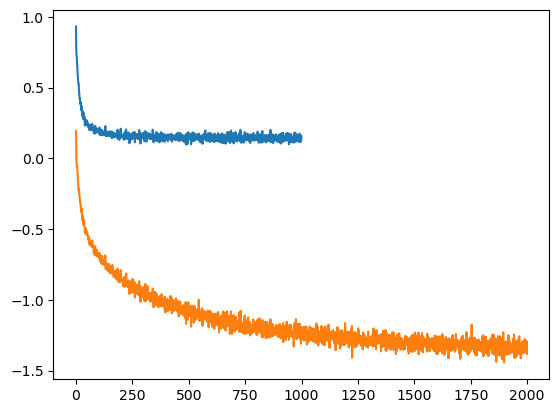

In [18]:
plt.plot(f0.loss)
plt.plot(f1.loss)

In [19]:
y_pred = f0.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.9129, dtype=torch.float64)


In [15]:
y_pred = f1.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.9165, dtype=torch.float64)


In [20]:
lower, upper = f0.credible_intervals(X)
print( (upper - lower).mean() )

lower, upper = f1.credible_intervals(X)
print( (upper - lower).mean() )

tensor(0.1911)
tensor(0.0822)


# SVMGUIDE 1

In [23]:
data = dsdl.load("svmguide1")

In [33]:
X, y = data.get_train()
X = X.todense()

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

print( X.shape )

X_test, y_test = data.get_test()
X_test = X_test.todense()

X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

X_test.shape

torch.Size([3089, 4])


torch.Size([4000, 4])

In [56]:
f0 = LogisticGPVI(y, X, n_inducing=50, n_iter=20, thresh=1e-6, verbose=False, use_loader=True, batches=20)
f0.fit()
f0.runtime

8.022528171539307

In [57]:
f1 = LogisticGPVI(y, X, likelihood=PGLikelihood(), n_inducing=50, n_iter=20, thresh=1e-6, verbose=False, use_loader=True, batches=20)
f1.fit()
f1.runtime

6.1525890827178955

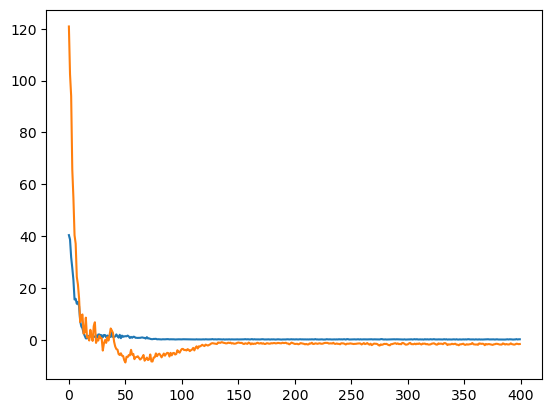

In [58]:
plt.plot(f0.loss)
plt.plot(f1.loss)

In [59]:
y_pred = f0.predict(X_test)

auc = BinaryAUROC()
auc.update(y_test, y_pred)
print(auc.compute())

tensor(0.9152, dtype=torch.float64)


In [60]:
y_pred = f1.predict(X_test)

auc = BinaryAUROC()
auc.update(y_test, y_pred)
print(auc.compute())

tensor(0.8976, dtype=torch.float64)


In [61]:
lower, upper = f0.credible_intervals(X_test)
print( (upper - lower).mean() )

lower, upper = f1.credible_intervals(X_test)
print( (upper - lower).mean() )

tensor(0.1361)
tensor(0.1036)


# General results

In [134]:
def print_results(res):
    
    for i in range(res.shape[0]):
        mean, sd = res[i].mean(dim=0), res[i].std(dim=0)
        l = ""
        for m, s in zip(mean, sd):
            l += f"{m:.2f} ({s:.2f}) \t "
            
        print(l[:-2])

In [135]:
datasets = ["breast-cancer", "diabetes_scale", "phishing", "svmguide1"]

for dataset in datasets:
    res = torch.load(f"../results/real_data/{dataset}.pt")
    print("\n" + dataset)
    # format nicely (auc, runtime, ci)

    print_results(res)



breast-cancer
12.69 (1.73) 	 0.96 (0.00) 	 0.73 (0.26) 	 48.68 (1.90) 	 3.81 (0.33) 	 48.68 (1.91) 	 3.81 (0.33) 	 48.92 (1.79) 	 3.83 (0.33) 
9.11 (2.22) 	 0.96 (0.00) 	 0.43 (0.07) 	 48.60 (1.70) 	 3.81 (0.28) 	 48.61 (1.70) 	 3.81 (0.28) 	 48.69 (1.72) 	 3.82 (0.28) 

diabetes_scale
13.00 (2.60) 	 0.68 (0.01) 	 0.89 (0.49) 	 317.03 (9.95) 	 35.40 (0.51) 	 317.02 (9.96) 	 35.40 (0.51) 	 320.13 (7.89) 	 35.75 (0.58) 
9.48 (2.58) 	 0.68 (0.00) 	 0.63 (0.25) 	 320.65 (5.74) 	 35.43 (0.46) 	 320.64 (5.74) 	 35.42 (0.46) 	 322.12 (4.75) 	 35.59 (0.48) 

phishing
118.64 (23.49) 	 0.91 (0.00) 	 0.07 (0.00) 	 1501.24 (35.19) 	 173.75 (6.53) 	 1501.23 (35.18) 	 173.74 (6.53) 	 1501.24 (35.19) 	 173.75 (6.53) 
97.59 (23.89) 	 0.91 (0.00) 	 0.07 (0.00) 	 1500.30 (34.88) 	 173.62 (6.52) 	 1500.30 (34.88) 	 173.62 (6.52) 	 1500.31 (34.88) 	 173.62 (6.52) 

svmguide1
12.43 (5.69) 	 0.94 (0.00) 	 3.44 (0.13) 	 257.68 (8.85) 	 350.78 (23.27) 	 258.00 (8.83) 	 350.87 (23.38) 	 267.45 (9.54) 	 362.65